# Let's work with medical images
The big challenge is always data... how to get it and how to get it into the model

### Two key approaches re medical imaging and deep learning libraries:
1. Bring the data to the DNN --> Convert medical imaging to well known data types. Often involves parsing the dicom into a pixel/voxel array and then saving that as a JPG or a numpy array. Then utilize out-of-the-box dataloaders to get your data into the DNN.

2. Bring the DNN to the data --> Build a custom dataloader that can work from a DICOM directory or NIFTI directory and serve those to a DNN as protobufs (Tensorflow), Torch Tensors (PyTorch), or numpy arrays (Keras)

### Imports

In [44]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random

data_transform = transforms.Compose([
        transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
cxr_dataset = datasets.ImageFolder(root='../data/cxr/train',
                                           transform=data_transform)
dataloader = torch.utils.data.DataLoader(cxr_dataset,
                                             batch_size=2, shuffle=True,
                                             num_workers=1)

In [45]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

0 torch.Size([2, 3, 224, 224])
1 torch.Size([2, 3, 224, 224])


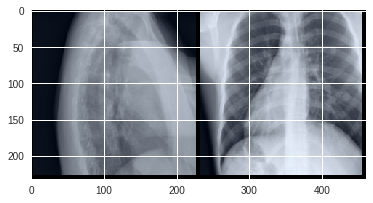

In [55]:
for i, imgs in enumerate(dataloader):
    print(i, imgs[0].size())
    
    # observe 4th batch and stop.
    if i == 1:
        show(make_grid(imgs[0], padding=5, normalize=True))